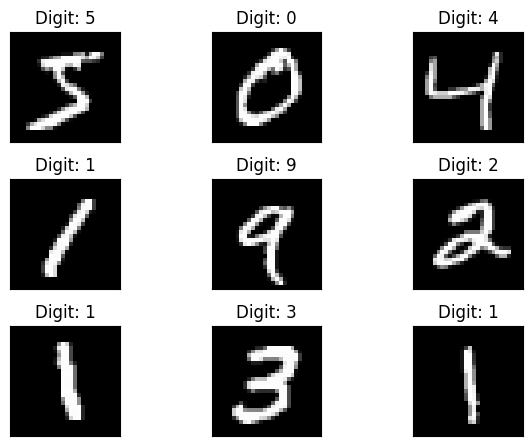

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)


In [3]:

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))


model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(len(train_labels[0]), activation='softmax'))



model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25


/Users/seungwoo/anaconda3/envs/dust/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5520 - loss: 1.8749
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6729 - loss: 1.2904
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6884 - loss: 0.9098
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6946 - loss: 0.6943
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7013 - loss: 0.5850
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7063 - loss: 0.5241
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7193 - loss: 0.4957
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.4774
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4506
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9010 - loss: 0.3841
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.3190
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9751 - loss: 0.1489
Test loss: 0.1183941513299942
Test accuracy: 0.9797999858856201


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


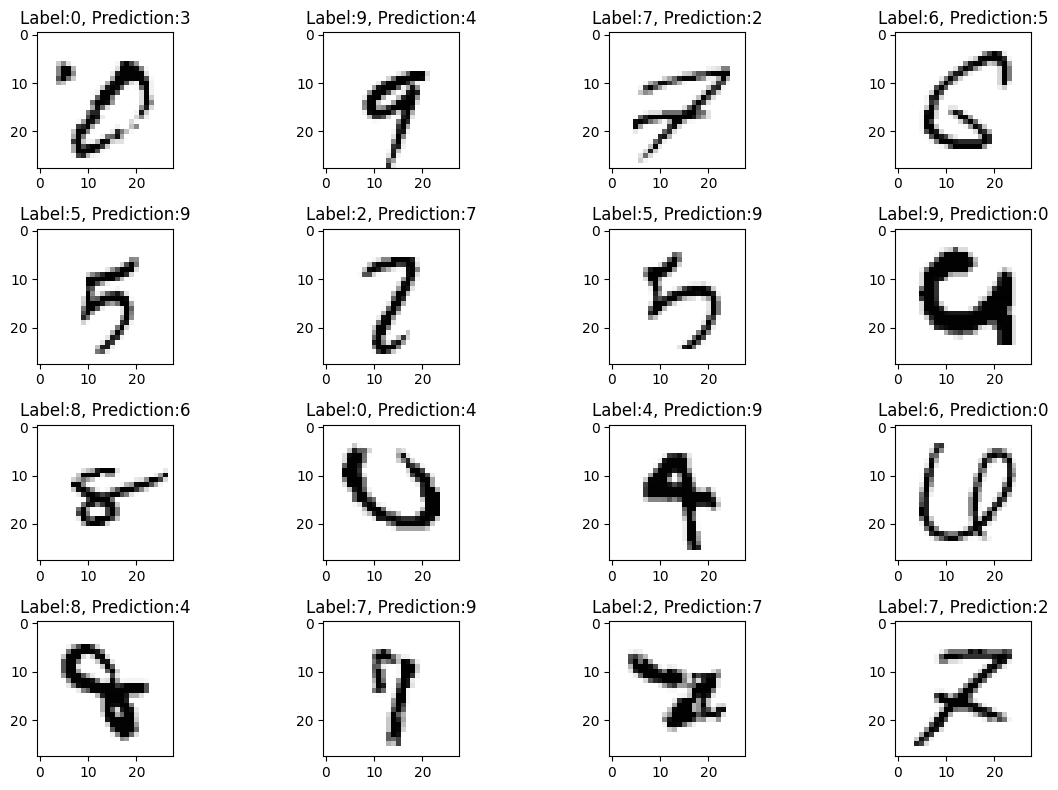

In [5]:
import random
import numpy as np
predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

test_label = np.argmax(test_labels, axis=1)

wrong_result = []

for n in range(0, len(test_label)):
    if predicted_labels[n] != test_label[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_label[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

